In [1]:
# append parent to path to allow imports
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent)) 

In [2]:


from pathlib import Path
import cv2
import numpy as np

from src.face import FaceDetector
from src.mask import MaskHandler
from src.projectUtils import Utils
from src.superpixels import SuperpixelExtractor, FeatureExtractor
from src.region import FeatureDivergence

In [3]:
fd = FaceDetector("../assets/lbfmodel.yaml")
mh = MaskHandler()

IMAGE_PATH = Path('test_images/helen1.jpg')

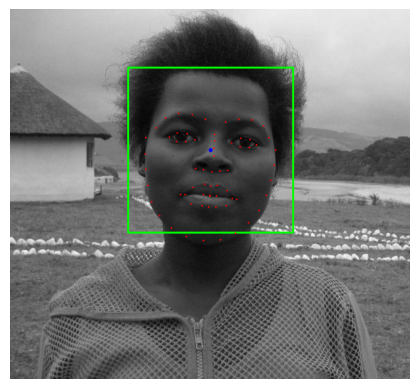

In [4]:
img_rgb, _, _, landmarks_all_faces = fd.detect(IMAGE_PATH)
Utils.display(img_rgb)

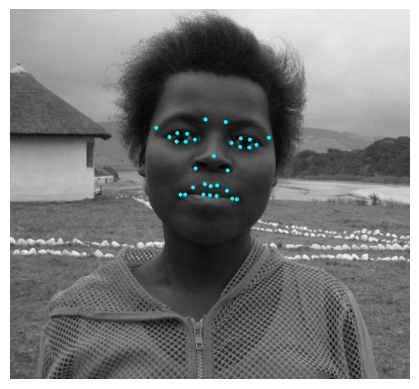

1


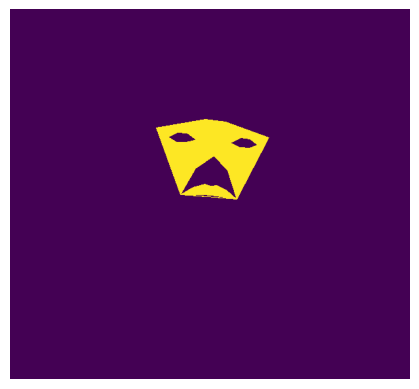

In [5]:
masked_img, selected_pts = mh.get_mask_points(IMAGE_PATH, landmarks_all_faces)
Utils.display(masked_img)

masks, masked_imgs = mh.build_masks(IMAGE_PATH, selected_pts)
print(len(masks))
Utils.display(masks[0])

1


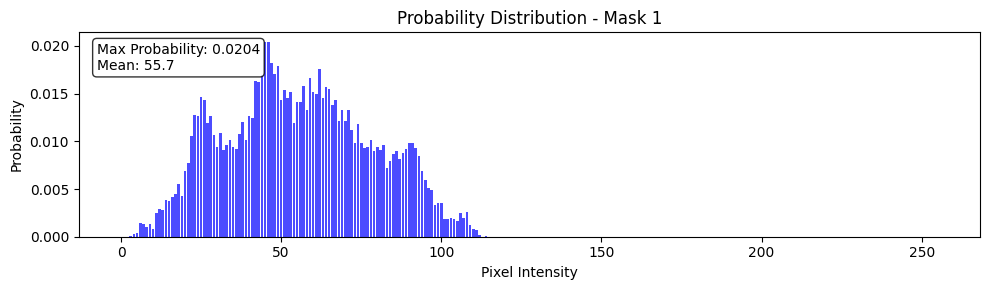

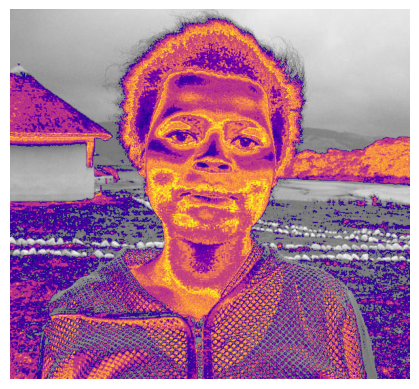

In [6]:
intensity_histograms = mh.get_intensity_histograms(IMAGE_PATH, masks)

print(len(intensity_histograms))
Utils.visualize_histograms(intensity_histograms)
Utils.apply_intensity_probability_map(IMAGE_PATH, intensity_histograms[0])

1
1
1


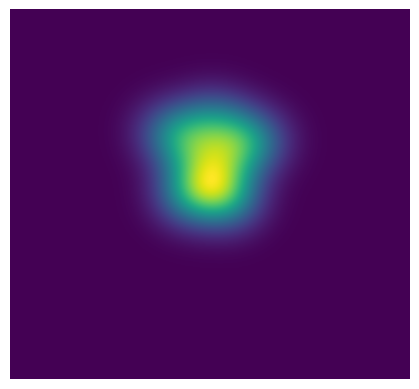

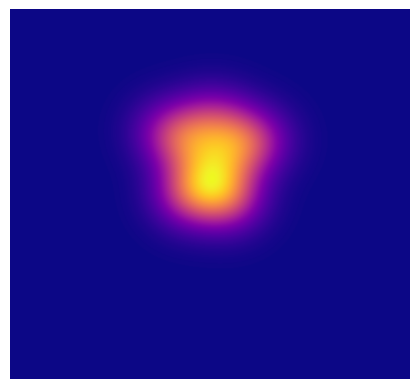

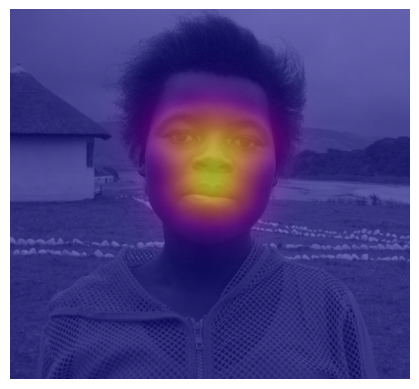

In [7]:
prior_face_masks, heatmaps, heatmaps_blended = mh.get_prior_face_masks(IMAGE_PATH, selected_pts)

print(len(prior_face_masks))
print(len(heatmaps))
print(len(heatmaps_blended))

idx = 0

Utils.display(prior_face_masks[idx])
Utils.display(heatmaps[idx])
Utils.display(heatmaps_blended[idx])

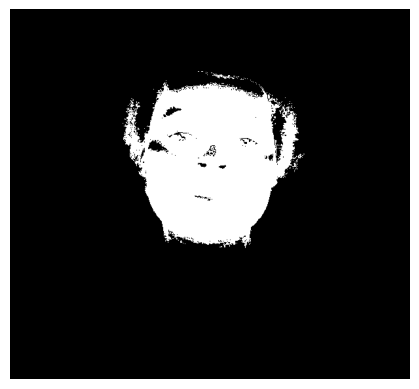

In [8]:
alpha = 0.69
lambda_ = 0.0018

skin_pixel_maps = mh.get_skin_pixel_maps(IMAGE_PATH, intensity_histograms, prior_face_masks, alpha, lambda_)

for i in skin_pixel_maps:
    Utils.display(i, cmap="gray")

In [9]:
spe = SuperpixelExtractor()
fe = FeatureExtractor()

slic, contoured_img, labels, num_superpixels = spe.get_slic_superpixels(IMAGE_PATH)

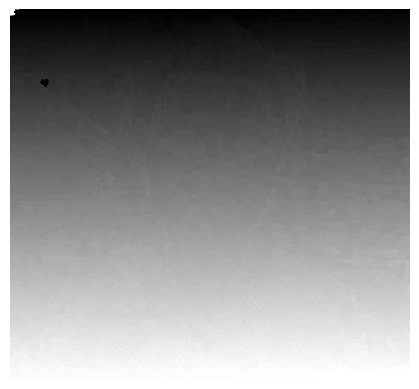

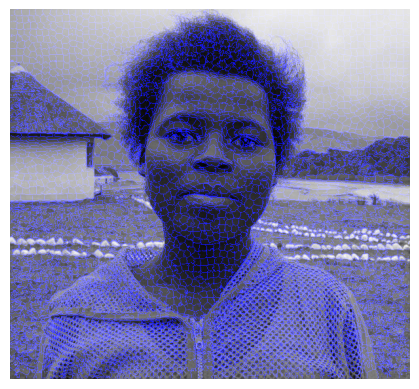

In [10]:
Utils.display(labels, cmap="gray")
Utils.display(contoured_img)

In [11]:
feature_vectors_sp = fe.extract_all_features_superpixels(IMAGE_PATH, slic)

In [12]:
feature_vector = fe.extract_all_features_mask(IMAGE_PATH, skin_pixel_maps[0])